# Chapter 2: The mathematical building blocks of neutral networks

In [4]:
#List 2.1 Loading the mnist datasets in keras
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))
print(train_labels)
print(test_labels)

(60000, 28, 28)
60000
(10000, 28, 28)
10000
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [5]:
#list 2.2 The network architecture 
from tensorflow.keras  import models
from tensorflow.keras import layers
model=models.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(10,activation='softmax')])
#softmax layer -> the summation of 10 probability scores to 1.

**Layers** is like filtration, data in data out. layers and layers consist of deep learning

In [6]:
#List 2.3 The compilation Step
model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
# List 2.4Preparing the image data, aka transforming data
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255 #first to 'float32'type, then reshape the value between 0 and 1
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

Keras  use **fit** method to fit data

In [9]:
#List 2.5 'Fitting the model'
model.fit(train_images,train_labels,epochs=5,batch_size=128)
#epochs: times to fit
#Note: Very interesting thing, why does my model have less accuracy?

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 1.4695 - accuracy: 0.6660
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5842 - accuracy: 0.8542
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4097 - accuracy: 0.8887
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3525 - accuracy: 0.9007
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3236 - accuracy: 0.9076


In [10]:
#List 2.6 Using the model to make prediction.
test_digits=test_images[0:10]
prediction=model.predict(test_digits)
prediction[0]#predict the first image

array([2.78670559e-05, 6.27630001e-08, 1.40429365e-05, 4.98568290e-04,
       1.23577433e-06, 1.70735457e-05, 6.47814646e-09, 9.97736931e-01,
       5.41475720e-06, 1.69872167e-03], dtype=float32)

In [11]:
prediction[0].argmax() #7 has the most probability to be our target number

7

In [12]:
prediction[0][7]# the number is 7 has the probability over 99.77%

0.99773693

In [14]:
test_labels[0] #yes, it's 7! Very Accurate!

7

In [16]:
#2.7 Evaluating the model on new data
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('test_acc:', test_acc)#It's okay, but still lower than the book.

313/313 [==============================] - 1s 2ms/step - loss: 0.3030 - accuracy: 0.9112
test_acc: 0.9111999869346619


Beautiful steps above, **7 steps** to make deep learning analysis.

## 2.2 Data Representations for neutral networks

**Tensors**: it's like a container for data. Tensors are a generalization of matrices to an arbitrary number of 
    *dimensions* (Dimension in tensor is called  ***axis***)

### 2.2.1 Scalars (rank-0 tensors)

**Scalar** (called: scalar tensor, rank-0 tensor or 0D tensor). float32/64 numbers are scalar tensor. \
**ndim** to display the *axis* of tensor. \
Number of axes is called ***rank***. 

In [17]:
import numpy as np
x=np.array(12)
x

array(12)

In [18]:
x.ndim

0

## 2.2.2 Vectors (rank-1 tensors)\
A rank-1 tensor is said to have exactly one axis(dimension).

In [19]:
x=np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

**Note:** this vector is 5-dimensional ***vector**(only have **one** axis, but 5 dimension along this axis), 
    **not** ***5D tensor***! Because 5D *tensor* has **5** axises.

In [22]:
m=np.array([[4],[4],[2],[2]])
m.ndim
#所以这里m是rank 2 tensors.

2

## 2.2.3 Matrices (Rank-2 tensors)
Matrix has two axes (rows and columns)

In [27]:
x=np.array([[5,78,2,34],
           [5,335,435,354],
           [435,425,654,754]])#can be understood using [] to combine arrays, to become matrix
x.ndim

2

## 2.2.4 Rank-3  tensors and higher-rank tensors

In [29]:
x=np.array([[[32,543,635,345],
            [5432,354,3542,6324]],
           [[534,5432,3542,413],
           [543,7546,84765,364]]])
x.ndim #[[]] to form a matrix, then [many matrices] to become rank-3 tensors.

3

## 2.2.5 Key attributes

In [32]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print('Dimension of train_images:', train_images.ndim)
print('Shape of train_images:', train_images.shape)
print('Data type of train_images:', train_images.dtype)

Dimension of train_images: 3
Shape of train_images: (60000, 28, 28)
Data type of train_images: uint8


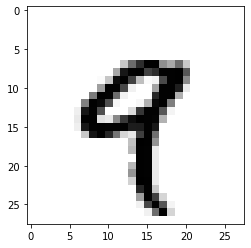

In [34]:
#List Displaying the fourth digit
digit=train_images[4]#Choose the fourth image
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)#Show images
plt.show()

In [36]:
train_labels[4]# Yes, it's number 9

9

## 2.2.6 Manipulating tensors in Numpy

In [37]:
#Tensor Slice
my_slice=train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [38]:
my_slice=train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [39]:
my_slice=train_images[10:100,0:28,0:28]
my_slice.shape #They are same

(90, 28, 28)

In [ ]:
my_slice=train_images[:,14:,14:]#select the right corner of the images
my_slice=train_images[:,7:-7,7:-7]# select the middle range of the images

## 2.2.7 The notion of data batches

The first axis is usually called the **sample axis** (Sometimes called the *sample dimension*)\
In deep learning, they usually seperate data to different groups (**batchs** in deep learning)


In [40]:
batch=train_images[:128]# the first batch

In [41]:
batch=train_images[128:256]# The second batch

In [42]:
# or general batchs method
n=3
batch=train_images[128*n:128*(n+1)]

In batch tensor, the first axis (axis 0) is usually **Batch axis** or ** bath dimension**.

## 2.2.8 Real-world examples of data tensors
* Vector-rank2-(samples, features)
* Timeseries data or sequence data- rank3-(samples, timesteps,features)
* Images-rank4-(samples,height,width,channels)
* Videos-rank5-(samples,frames,height,width,channels)